In [12]:
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile
import wave
import contextlib
import librosa
import numpy as np
import os
import pandas as pd
import soundfile
import sys
import os
import numpy as np
from pydub import AudioSegment, effects
import librosa
import noisereduce as nr
import matplotlib.pyplot as plt
from librosa import display   
import IPython.display as ipd
import wave
import contextlib
import joblib

/home/jupyter-reynaldo_delimajr/.local/lib/python3.7/site-packages/pydub/utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


# README for data

These are the file names (in folder IEMOCAP_Data/Processed) to use for training and testing (not splitted or modified yet, all 4784 data): <b> audio_features_mel_2d, audio_features_mfcc_2d, wav_file_names, labels



#####  Source for process: https://github.com/MeidanGR/SpeechEmotionRecognition_Realtime/blob/main/1_preprocess_for_one_audiofile.ipynb

We open two separate sentence files.

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  after removing the cwd from sys.path.


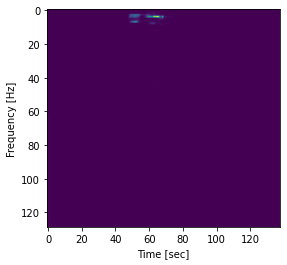

In [13]:
sample_rate, samples = wavfile.read('IEMOCAP_Extracted/IEMOCAP_full_release/Session1/sentences/wav/Ses01F_impro01/Ses01F_impro01_F000.wav')
frequencies, times, spectrogram = signal.spectrogram(samples, sample_rate)

plt.pcolormesh(times, frequencies, spectrogram)
plt.imshow(spectrogram)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  after removing the cwd from sys.path.


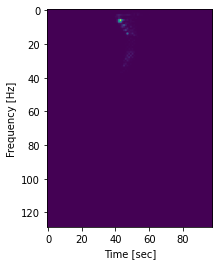

In [14]:
sample_rate, samples = wavfile.read('IEMOCAP_Extracted/IEMOCAP_full_release/Session1/sentences/wav/Ses01F_impro01/Ses01F_impro01_F001.wav')
frequencies, times, spectrogram = signal.spectrogram(samples, sample_rate)

plt.pcolormesh(times, frequencies, spectrogram)
plt.imshow(spectrogram)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

We can see that the length per audio file is irregular, as the time (in seconds) are different for the two sample files.

In [15]:
import librosa
import numpy as np
import os
import pandas as pd
import soundfile
import sys

import os
import numpy as np

from pydub import AudioSegment, effects
import librosa
import noisereduce as nr

import matplotlib.pyplot as plt
from librosa import display   
import IPython.display as ipd

In [5]:
path1 = 'IEMOCAP_Extracted/IEMOCAP_full_release/Session1/sentences/wav/Ses01F_impro01/Ses01F_impro01_F000.wav'
path2 = 'IEMOCAP_Extracted/IEMOCAP_full_release/Session1/sentences/wav/Ses01F_impro06/Ses01F_impro06_F028.wav'

Load the audio file into an 'AudioSegment' object, and extract the sample rate. 

FileNotFoundError: [Errno 2] No such file or directory: 'ffmpeg': 'ffmpeg'

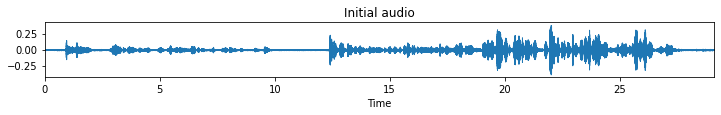

In [7]:
#    'x' is an array of samples that is only relevant for visualization at this part.


rawsound = AudioSegment.from_file(path2)
x, sr = librosa.load(path2, sr = None)

plt.figure(figsize=(12,1))
librosa.display.waveplot(x, sr)
plt.title('Initial audio')

rawsound

Normalize to +5.0 dBFS, Transform audio signals to an array

FileNotFoundError: [Errno 2] No such file or directory: 'ffmpeg': 'ffmpeg'

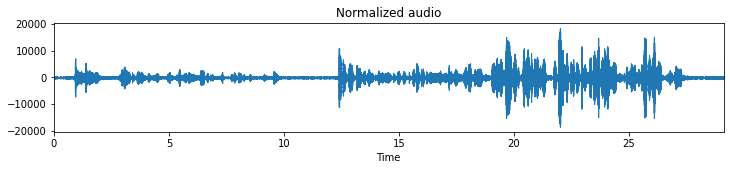

In [8]:
# pydub.effects.normalize

normalizedsound = effects.normalize(rawsound, headroom = 5.0) 
normal_x = np.array(normalizedsound.get_array_of_samples(), dtype = 'float32')

plt.figure(figsize=(12,2))
librosa.display.waveplot(normal_x, sr)
plt.title('Normalized audio')

normalizedsound

Trim silence in the beginning and end.

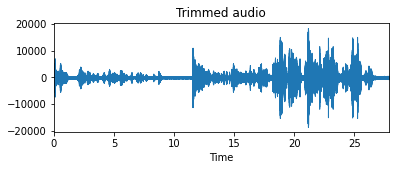

In [9]:
xt, index = librosa.effects.trim(normal_x, top_db = 30)

plt.figure(figsize=(6,2))
librosa.display.waveplot(xt, sr)
plt.title('Trimmed audio')

ipd.display(ipd.Audio(data = xt, rate=sr))

Right-side padding for length equalization, we do this so that all audio files have the same length based on maximum audio

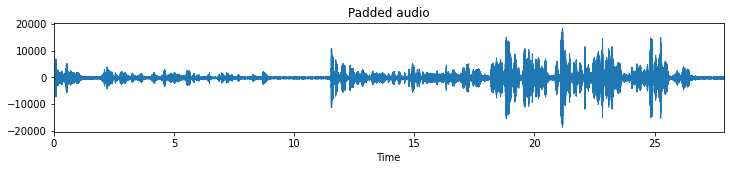

In [248]:
# 445952 = maximum lengthed audio

padded_x = np.pad(xt, (0, 445952-len(xt)), 'constant')

plt.figure(figsize=(12,2))
librosa.display.waveplot(padded_x, sr)
plt.title('Padded audio')

ipd.display(ipd.Audio(data = padded_x, rate=sr))

### We visualize the duration of each naturalistic audio data to find how many we need to zero-pad.

In [249]:
n_files = 0
histogram_duration = []
for i in range(1, 6):
    path = f'IEMOCAP_Extracted/IEMOCAP_full_release/Session{i}/sentences/wav'
    for folder in sorted(os.listdir(path)):
        if folder == '.ipynb_checkpoints':
            continue
        elif folder[7] == 's':
            continue
        for file in sorted(os.listdir(f'{path}/{folder}')):
            if file == '.ipynb_checkpoints':
                continue
            elif file[-4:] != '.wav':
                continue
                
            with contextlib.closing(wave.open(path+"/"+folder+"/"+file,'r')) as f:
                frames = f.getnframes()
                rate = f.getframerate()
                duration = frames / float(rate)
                histogram_duration.append(duration)
                
            #feature = wav_to_mfcc(f'{path}/{folder}/{file}')
            #X.append(feature)
            #wav_name.append(f'{file}')

In [250]:
len(histogram_duration)

4784

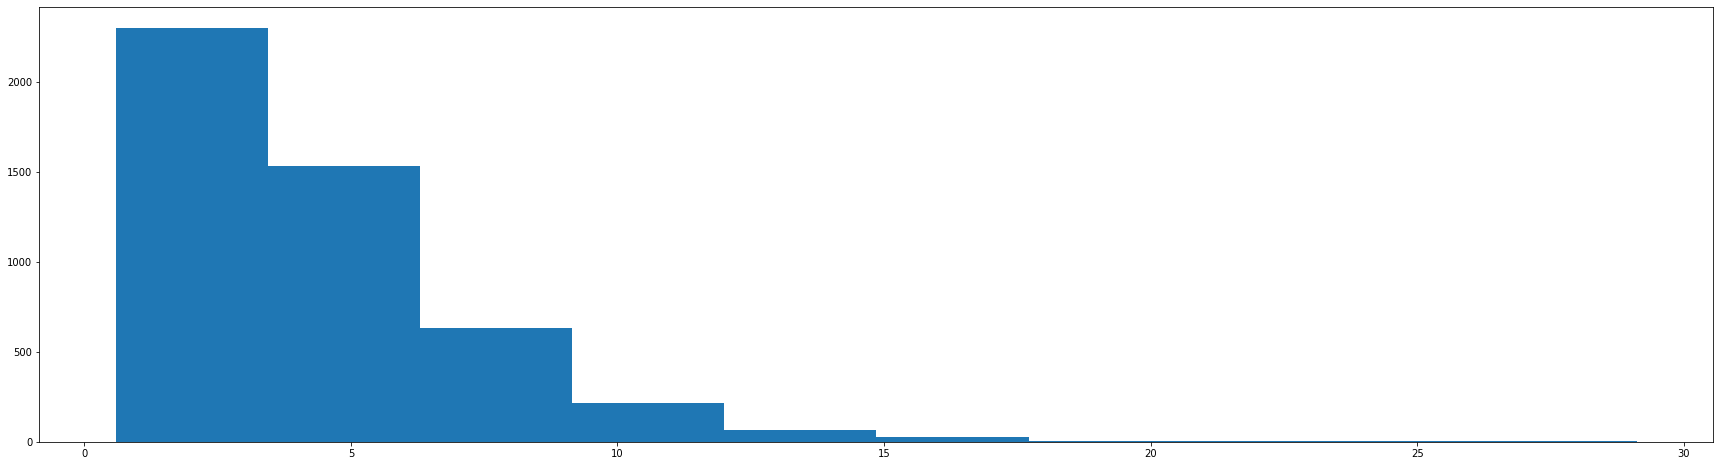

In [263]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (30,8)
plt.hist(histogram_duration, bins = 10)
plt.show()

In [252]:
histogram_duration_df = pd.DataFrame(histogram_duration, columns = ['duration'])

In [253]:
histogram_duration_df

duration
0     1.945563
1     1.382437
2     3.130250
3     1.497500
4     3.414250
...        ...
4779  2.230000
4780  6.699937
4781  6.899938
4782  3.129938
4783  1.680000

[4784 rows x 1 columns]

In [255]:
labels = labels = ["{0} - {1}".format(i, i+1) for i in range(0, 30, 1)]
histogram_duration_category = pd.cut(histogram_duration_df.duration,range(0,31,1), right=False, labels = labels)

In [256]:
frame ={'category': histogram_duration_category}
histogram_category= pd.DataFrame(frame)

In [257]:
histogram_category

category
0       1 - 2
1       1 - 2
2       3 - 4
3       1 - 2
4       3 - 4
...       ...
4779    2 - 3
4780    6 - 7
4781    6 - 7
4782    3 - 4
4783    1 - 2

[4784 rows x 1 columns]

In [258]:
histogram_duration_final_df = pd.concat([histogram_duration_df, histogram_category], axis=1)

In [259]:
histogram_duration_final_df['category'].value_counts(dropna = False)

2 - 3      1011
1 - 2       886
3 - 4       765
4 - 5       606
5 - 6       410
6 - 7       373
7 - 8       223
8 - 9       148
9 - 10      105
10 - 11      74
11 - 12      49
12 - 13      36
0 - 1        31
13 - 14      22
15 - 16      13
14 - 15       8
16 - 17       8
17 - 18       5
19 - 20       2
23 - 24       2
18 - 19       1
20 - 21       1
22 - 23       1
24 - 25       1
25 - 26       1
26 - 27       1
29 - 30       1
21 - 22       0
27 - 28       0
28 - 29       0
Name: category, dtype: int64

In [260]:
histogram_duration_final_df = histogram_duration_final_df['category'].value_counts().rename_axis('seconds').reset_index(name='counts')
print (histogram_duration_final_df)

    seconds  counts
0     2 - 3    1011
1     1 - 2     886
2     3 - 4     765
3     4 - 5     606
4     5 - 6     410
5     6 - 7     373
6     7 - 8     223
7     8 - 9     148
8    9 - 10     105
9   10 - 11      74
10  11 - 12      49
11  12 - 13      36
12    0 - 1      31
13  13 - 14      22
14  15 - 16      13
15  14 - 15       8
16  16 - 17       8
17  17 - 18       5
18  19 - 20       2
19  23 - 24       2
20  18 - 19       1
21  20 - 21       1
22  22 - 23       1
23  24 - 25       1
24  25 - 26       1
25  26 - 27       1
26  29 - 30       1
27  21 - 22       0
28  27 - 28       0
29  28 - 29       0


In [266]:
histogram_duration_final_df.sort_values(by=['seconds'])

seconds  counts
12    0 - 1      31
1     1 - 2     886
0     2 - 3    1011
2     3 - 4     765
3     4 - 5     606
4     5 - 6     410
5     6 - 7     373
6     7 - 8     223
7     8 - 9     148
8    9 - 10     105
9   10 - 11      74
10  11 - 12      49
11  12 - 13      36
13  13 - 14      22
15  14 - 15       8
14  15 - 16      13
16  16 - 17       8
17  17 - 18       5
20  18 - 19       1
18  19 - 20       2
21  20 - 21       1
27  21 - 22       0
22  22 - 23       1
19  23 - 24       2
23  24 - 25       1
24  25 - 26       1
25  26 - 27       1
28  27 - 28       0
29  28 - 29       0
26  29 - 30       1

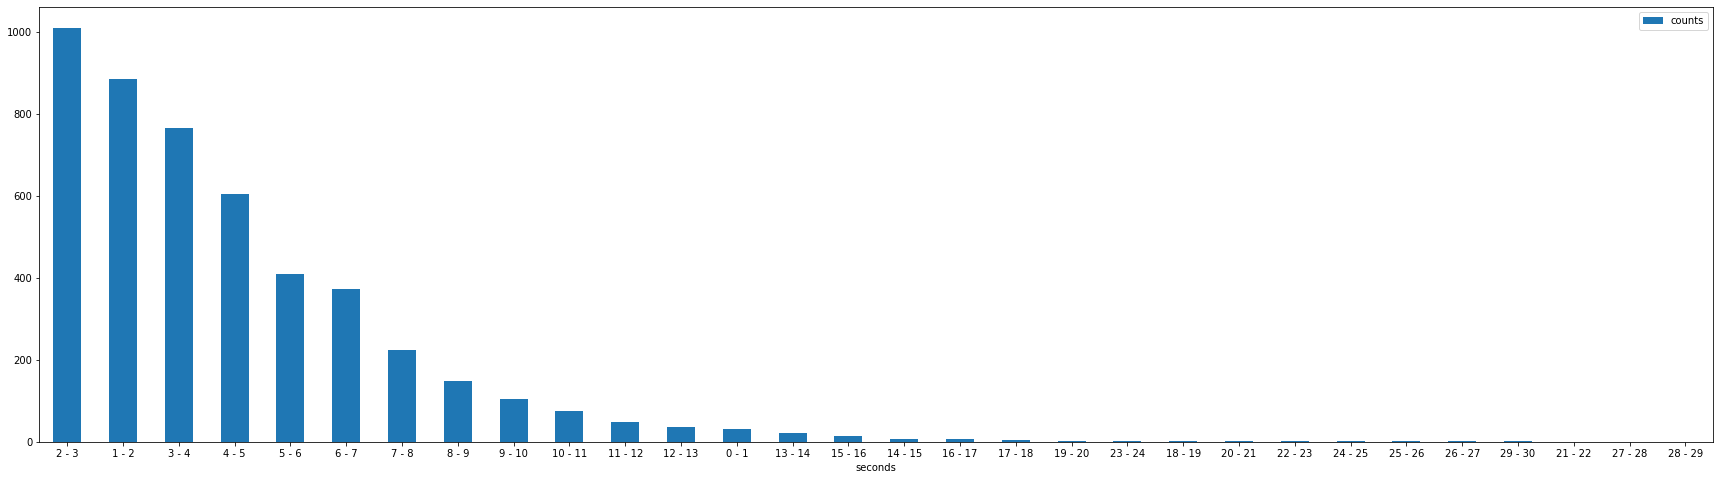

In [264]:
ax = histogram_duration_final_df.plot.bar(x='seconds', y='counts', rot=0)

Line graph: 


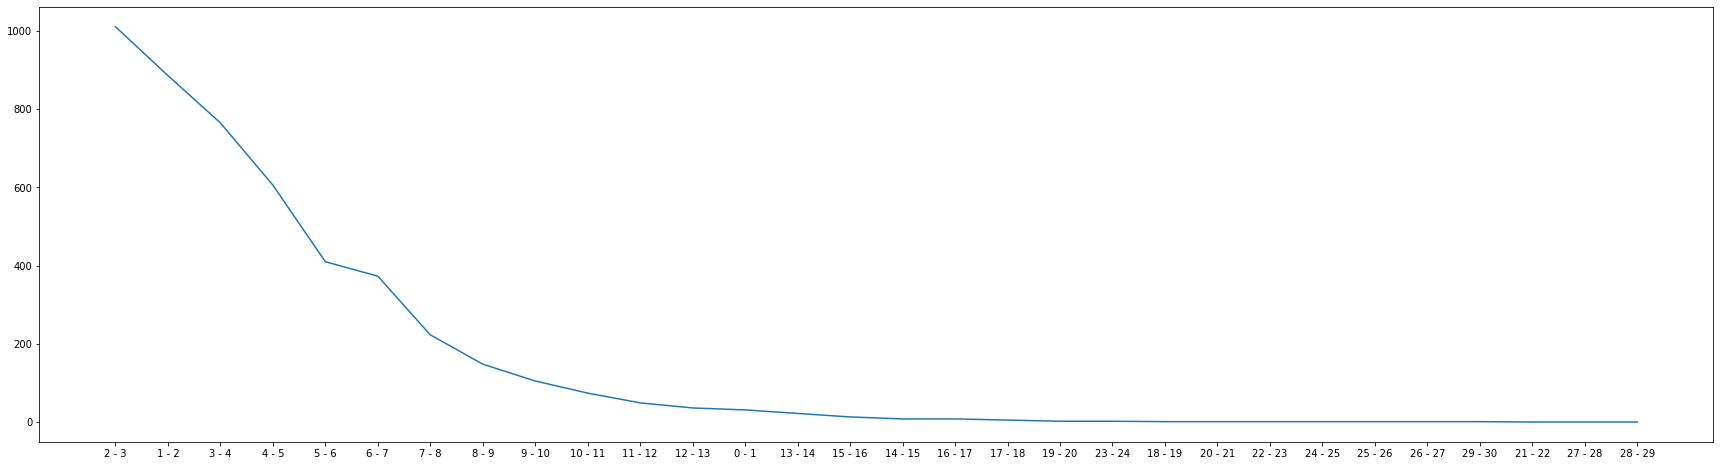

In [265]:
print("Line graph: ")
plt.plot(histogram_duration_final_df["seconds"], histogram_duration_final_df["counts"])
plt.show()

In [283]:
first_10 = 0
latter = 0
for index, row in histogram_duration_final_df.iterrows():
    if(index < 10):
        first_10 += row['counts']
    else:
        latter += row['counts']

In [284]:
first_10

4601

In [285]:
latter 

183

We can see that audio files that are less than 10 seconds (4601) take up majority of the naturalistic dataset. While audio data that are more than 10 seconds (183) only take up about only <b>3.8%</b> of the naturalistic dataset. 

### Starting the Pre-Processing

Sample duration

In [11]:
import wave
import contextlib
fname = 'IEMOCAP_Extracted/IEMOCAP_full_release/Session1/sentences/wav/Ses01F_impro01/Ses01F_impro01_F000.wav'
with contextlib.closing(wave.open(fname,'r')) as f:
    frames = f.getnframes()
    rate = f.getframerate()
    duration = frames / float(rate)
    print(duration)

1.9455625


In [12]:
max_length = 0
path_max = ''

We get the maximum duration of a sentence wav file 

In [18]:
n_files = 0
for i in range(1, 6):
    path = f'IEMOCAP_Extracted/IEMOCAP_full_release/Session{i}/sentences/wav'
    for folder in sorted(os.listdir(path)):
        if folder == '.ipynb_checkpoints':
            continue
        elif folder[7] == 's':
            continue
        for file in sorted(os.listdir(f'{path}/{folder}')):
            if file == '.ipynb_checkpoints':
                continue
            elif file[-4:] != '.wav':
                continue
                
            with contextlib.closing(wave.open(path+"/"+folder+"/"+file,'r')) as f:
                frames = f.getnframes()
                rate = f.getframerate()
                duration = frames / float(rate)
                if(duration > max_length):
                    max_length = duration
                    path_max = file
                #print(duration)
            #feature = wav_to_mfcc(f'{path}/{folder}/{file}')
            #X.append(feature)
            #wav_name.append(f'{file}')

1.9455625
1.3824375
3.13025
1.4975
3.41425
4.0299375
4.625
5.61
2.6625
4.1
2.92
9.81
2.75
3.3518125
5.07
2.74
2.90375
3.7383125
2.88225
4.56
2.816625
8.1215
5.75
6.2399375
4.4099375
7.49
4.4399375
7.2399375
2.8199375
6.0299375
9.3311875
2.93
5.7235
5.6525
5.7699375
2.56
4.215
6.18
3.8868125
4.33
4.25
3.33525
3.0305
6.1254375
7.4
3.587875
2.1899375
6.6549375
3.05
3.059375
4.5299375
3.026375
5.7958125
6.2399375
6.3433125
3.305
4.9499375
6.9599375
3.8299375
2.634625
3.6725
4.2194375
3.2199375
4.6800625
4.73
4.615
1.25
4.4153125
2.86
3.4399375
2.5699375
4.6166875
3.7699375
2.581625
6.34
4.4650625
2.67
1.6999375
3.2049375
2.1324375
2.2849375
5.1299375
5.74
4.5749375
2.0524375
2.9825
2.9225
1.4199375
1.3799375
5.46
2.2524375
0.8424375
4.4025
3.93
6.0099375
2.2199375
2.0599375
3.31
3.9775
2.5768125
2.37
2.09
2.7524375
1.3199375
4.91
2.8199375
3.93
3.915
2.7975
3.5874375
2.18
1.805
2.6675
1.4375
4.79
4.62
2.68
1.66
3.6899375
2.2199375
4.3945
4.405125
12.2975625
2.791
1.72
2.4095625
3.5565
4.2


In [19]:
max_length

29.1299375

In [15]:
max_length = 28

In [16]:
sample_length = []

In [20]:
for i in range(1, 6):
    path = f'IEMOCAP_Extracted/IEMOCAP_full_release/Session{i}/sentences/wav'
    for folder in sorted(os.listdir(path)):
        if folder == '.ipynb_checkpoints':
            continue
        elif folder[7] == 's':
            continue
        for file in sorted(os.listdir(f'{path}/{folder}')):
            if file == '.ipynb_checkpoints':
                continue
            elif file[-4:] != '.wav':
                continue
                
            wav_path = path+"/"+folder+"/"+file
            with contextlib.closing(wave.open(wav_path,'r')) as f:
                x, sr = librosa.load(path = wav_path, sr = None)
                xt, index = librosa.effects.trim(x, top_db=30)

                sample_length.append(len(xt))
                
                

In [23]:
print('Maximum sample length:', np.max(sample_length))     

Maximum sample length: 445952


In [24]:
total_length = np.max(sample_length)

In [25]:
total_length

445952

#### Now we have the maximum sample length, we pad the audio files based on this

In [21]:
X_mel, X_mfcc, wav_name = [], [], []

In [22]:
wav_file = []

In [26]:
for i in range(1, 6):
    path = f'IEMOCAP_Extracted/IEMOCAP_full_release/Session{i}/sentences/wav'
    for folder in sorted(os.listdir(path)):
        if folder == '.ipynb_checkpoints':
            continue
        elif folder[7] == 's':
            continue
        for file in sorted(os.listdir(f'{path}/{folder}')):
            if file == '.ipynb_checkpoints':
                continue
            elif file[-4:] != '.wav':
                continue
                
            wav_path = path+"/"+folder+"/"+file
            with contextlib.closing(wave.open(wav_path,'r')) as f:
                
                # Fetch the sample rate.
                _, sr = librosa.load(path = wav_path, sr = None) # sr (the sample rate) is used for librosa's MFCCs. '_' is irrelevant.
                # Load the audio file.
                rawsound = AudioSegment.from_file(wav_path) 
                # Normalize the audio to +5.0 dBFS.
                normalizedsound = effects.normalize(rawsound, headroom = 0) 
                # Transform the normalized audio to np.array of samples.
                normal_x = np.array(normalizedsound.get_array_of_samples(), dtype = 'float32')
                # Trim silence from the beginning and the end.
                xt, index = librosa.effects.trim(normal_x, top_db=30)
                #print(file,"\t", len(xt), "\t", rawsound.dBFS, "\t", normalizedsound.dBFS) #--QA purposes if needed-- 
                # Pad for duration equalization.
                padded_x = np.pad(xt, (0, total_length-len(xt)), 'constant')
                # Noise reduction.
                final_x = nr.reduce_noise(padded_x, sr=sr) #updated 03/03/22
            
                # Features extraction 
                mel = librosa.feature.melspectrogram(final_x, sr=sr)
                mfcc = librosa.feature.mfcc(y=final_x, sr=sr, n_mfcc=40)
                
                X_mel.append(mel)
                X_mfcc.append(mfcc)
                wav_name.append(wav_path)    

In [83]:
import joblib

In [27]:
joblib.dump(X_mel, 'IEMOCAP_Data/Try/audio_features_mel_2d', compress=0, protocol=None, cache_size=None)

['IEMOCAP_Data/Try/audio_features_mel_2d']

In [28]:
joblib.dump(X_mfcc, 'IEMOCAP_Data/Try/audio_features_mfcc_2d', compress=0, protocol=None, cache_size=None)

['IEMOCAP_Data/Try/audio_features_mfcc_2d']

In [29]:
joblib.dump(wav_name, 'IEMOCAP_Data/Try/wav_file_names', compress=0, protocol=None, cache_size=None)

['IEMOCAP_Data/Try/wav_file_names']

In [34]:
X_mel

[array([[5.0159760e+07, 2.0197450e+08, 4.9204381e+08, ..., 0.0000000e+00,
         0.0000000e+00, 0.0000000e+00],
        [2.3589726e+08, 3.4041859e+08, 8.8543251e+08, ..., 0.0000000e+00,
         0.0000000e+00, 0.0000000e+00],
        [1.4810438e+08, 5.1050102e+08, 4.7603120e+08, ..., 0.0000000e+00,
         0.0000000e+00, 0.0000000e+00],
        ...,
        [1.3037023e+04, 3.4008818e+03, 3.7222187e+01, ..., 0.0000000e+00,
         0.0000000e+00, 0.0000000e+00],
        [1.3335338e+04, 3.5239917e+03, 6.8003319e+01, ..., 0.0000000e+00,
         0.0000000e+00, 0.0000000e+00],
        [1.1610284e+04, 3.1043638e+03, 9.6246140e+01, ..., 0.0000000e+00,
         0.0000000e+00, 0.0000000e+00]], dtype=float32),
 array([[4.60500000e+07, 5.04898200e+07, 1.88164700e+07, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [6.24775320e+07, 8.14111280e+07, 1.08348936e+08, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [4.22185840e+07, 9.21111440e+07, 6.381

In [35]:
X_mel_np = np.array(X_mel)

In [36]:
X_mel_np.shape

(4784, 128, 872)

We only want the sentence-form filename.

In [37]:
wav_name[0][77:-4]

'Ses01F_impro01_F000'

In [38]:
wav_file = []

In [39]:
for i in range(len(wav_name)):
    wav_file.append(wav_name[i][77:-4])

In [40]:
counter = 0
for i in range(len(wav_file)):
    counter += 1
    print(wav_file[i])

Ses01F_impro01_F000
Ses01F_impro01_F001
Ses01F_impro01_F002
Ses01F_impro01_F003
Ses01F_impro01_F004
Ses01F_impro01_F005
Ses01F_impro01_F006
Ses01F_impro01_F007
Ses01F_impro01_F008
Ses01F_impro01_F009
Ses01F_impro01_F010
Ses01F_impro01_F011
Ses01F_impro01_F012
Ses01F_impro01_F013
Ses01F_impro01_F014
Ses01F_impro01_F015
Ses01F_impro01_M000
Ses01F_impro01_M001
Ses01F_impro01_M002
Ses01F_impro01_M003
Ses01F_impro01_M004
Ses01F_impro01_M005
Ses01F_impro01_M006
Ses01F_impro01_M007
Ses01F_impro01_M008
Ses01F_impro01_M009
Ses01F_impro01_M010
Ses01F_impro01_M011
Ses01F_impro01_M012
Ses01F_impro01_M013
Ses01F_impro02_F000
Ses01F_impro02_F001
Ses01F_impro02_F002
Ses01F_impro02_F003
Ses01F_impro02_F004
Ses01F_impro02_F005
Ses01F_impro02_F006
Ses01F_impro02_F007
Ses01F_impro02_F008
Ses01F_impro02_F009
Ses01F_impro02_F010
Ses01F_impro02_F011
Ses01F_impro02_F012
Ses01F_impro02_F013
Ses01F_impro02_F014
Ses01F_impro02_F015
Ses01F_impro02_F016
Ses01F_impro02_F017
Ses01F_impro02_F018
Ses01F_impro02_F019


#### Get labels and compare

In [41]:
labels_df = pd.read_csv('IEMOCAP_Data/PreProcessed/audio_labels.csv')

In [42]:
labels_df

wav_file  label  sig_mean   sig_std  rmse_mean  rmse_std  \
0     Ses01M_impro02_F000      7  0.003413  0.005788   0.004287  0.003883   
1     Ses01M_impro02_F001      8  0.005257  0.012346   0.006429  0.010533   
2     Ses01M_impro02_F002      6  0.012548  0.028081   0.015530  0.023388   
3     Ses01M_impro02_F003      4  0.007256  0.022428   0.009001  0.020526   
4     Ses01M_impro02_F004      4  0.016902  0.032649   0.021447  0.024591   
...                   ...    ...       ...       ...        ...       ...   
4778  Ses05M_impro01_M018      4  0.019835  0.032808   0.024672  0.021598   
4779  Ses05M_impro01_M019      4  0.022502  0.033582   0.028629  0.017509   
4780  Ses05M_impro01_M020      4  0.022871  0.039609   0.029132  0.026683   
4781  Ses05M_impro01_M021      4  0.034921  0.059654   0.042590  0.041631   
4782  Ses05M_impro01_M022      4  0.003833  0.007940   0.004973  0.006189   

       silence  harmonic  auto_corr_max  auto_corr_std  
0     0.003413 -0.009328       0.025065       0.099574  
1     0.549180 -0.013551       0.131988       0.267860  
2     0.675373 -0.009724       0.667862       2.081483  
3     0.742754 -0.012758       0.463583       1.236247  
4     0.489796 -0.003097       0.850267       1.583471  
...        ...       ...            ...            ...  
4778  0.284254 -0.005337       0.782944       2.935757  
4779  0.203540 -0.005063       0.755438       2.274557  
4780  0.261745 -0.010324       1.179410       1.685914  
4781  0.329502 -0.004222       2.652081      18.629391  
4782  0.598551 -0.007821       0.052129       0.166138  

[4783 rows x 10 columns]

In [43]:
labels_df = labels_df.sort_values(by=['wav_file'], ascending=True)
labels_df = labels_df.reset_index()
labels_df.drop('index', inplace=True, axis=1)
labels_df.drop(['sig_mean', 'sig_std', 'rmse_mean', 'rmse_std', 'silence', 'harmonic', 'auto_corr_max', 'auto_corr_std'], axis=1, inplace=True)
#labels_df = labels_df.drop(columns=['Unnamed: 0'])
labels_df

wav_file  label
0     Ses01F_impro01_F000      7
1     Ses01F_impro01_F001      7
2     Ses01F_impro01_F002      7
3     Ses01F_impro01_F003      8
4     Ses01F_impro01_F004      8
...                   ...    ...
4778  Ses05M_impro08_M024      7
4779  Ses05M_impro08_M025      7
4780  Ses05M_impro08_M026      1
4781  Ses05M_impro08_M027      7
4782  Ses05M_impro08_M028      1

[4783 rows x 2 columns]

In [44]:
for i in range(len(wav_file)):
    if(wav_file[i][0] == '/'):
        wav_file[i] = wav_file[1:]

# LOAD DATA

In [45]:
## LOAD MEL DATA
f = open('IEMOCAP_Data/Processed/audio_features_mel_2d', 'rb')
dic = joblib.load(f)
f.close()

In [46]:
X_mel_np = dic

In [47]:
X_mel_np = np.array(dic)

In [48]:
X_mel_np.shape

(4784, 128, 872)

In [49]:
## LOAD LABELS
labels_df = pd.read_csv('IEMOCAP_Data/PreProcessed/audio_labels.csv')

In [50]:
labels_df

wav_file  label  sig_mean   sig_std  rmse_mean  rmse_std  \
0     Ses01M_impro02_F000      7  0.003413  0.005788   0.004287  0.003883   
1     Ses01M_impro02_F001      8  0.005257  0.012346   0.006429  0.010533   
2     Ses01M_impro02_F002      6  0.012548  0.028081   0.015530  0.023388   
3     Ses01M_impro02_F003      4  0.007256  0.022428   0.009001  0.020526   
4     Ses01M_impro02_F004      4  0.016902  0.032649   0.021447  0.024591   
...                   ...    ...       ...       ...        ...       ...   
4778  Ses05M_impro01_M018      4  0.019835  0.032808   0.024672  0.021598   
4779  Ses05M_impro01_M019      4  0.022502  0.033582   0.028629  0.017509   
4780  Ses05M_impro01_M020      4  0.022871  0.039609   0.029132  0.026683   
4781  Ses05M_impro01_M021      4  0.034921  0.059654   0.042590  0.041631   
4782  Ses05M_impro01_M022      4  0.003833  0.007940   0.004973  0.006189   

       silence  harmonic  auto_corr_max  auto_corr_std  
0     0.003413 -0.009328       0.025065       0.099574  
1     0.549180 -0.013551       0.131988       0.267860  
2     0.675373 -0.009724       0.667862       2.081483  
3     0.742754 -0.012758       0.463583       1.236247  
4     0.489796 -0.003097       0.850267       1.583471  
...        ...       ...            ...            ...  
4778  0.284254 -0.005337       0.782944       2.935757  
4779  0.203540 -0.005063       0.755438       2.274557  
4780  0.261745 -0.010324       1.179410       1.685914  
4781  0.329502 -0.004222       2.652081      18.629391  
4782  0.598551 -0.007821       0.052129       0.166138  

[4783 rows x 10 columns]

Since we want to only focus on mel spectrogram and mfccs, we drop the unnecessary columns.

In [51]:
labels_df = labels_df.sort_values(by=['wav_file'], ascending=True)
labels_df = labels_df.reset_index()
labels_df.drop('index', inplace=True, axis=1)
labels_df.drop(['sig_mean', 'sig_std', 'rmse_mean', 'rmse_std', 'silence', 'harmonic', 'auto_corr_max', 'auto_corr_std'], axis=1, inplace=True)
#labels_df = labels_df.drop(columns=['Unnamed: 0'])
labels_df

wav_file  label
0     Ses01F_impro01_F000      7
1     Ses01F_impro01_F001      7
2     Ses01F_impro01_F002      7
3     Ses01F_impro01_F003      8
4     Ses01F_impro01_F004      8
...                   ...    ...
4778  Ses05M_impro08_M024      7
4779  Ses05M_impro08_M025      7
4780  Ses05M_impro08_M026      1
4781  Ses05M_impro08_M027      7
4782  Ses05M_impro08_M028      1

[4783 rows x 2 columns]

We want to import the wav file names for referencing.

In [52]:
### LOAD THE WAV NAMES
f = open('IEMOCAP_Data/Processed/wav_file_names', 'rb')
dic = joblib.load(f)
f.close()

In [53]:
wav_file = []
for i in range(len(dic)):
    wav_file.append(dic[i][77:-4])

In [54]:
wav_file

['Ses01F_impro01_F000',
 'Ses01F_impro01_F001',
 'Ses01F_impro01_F002',
 'Ses01F_impro01_F003',
 'Ses01F_impro01_F004',
 'Ses01F_impro01_F005',
 'Ses01F_impro01_F006',
 'Ses01F_impro01_F007',
 'Ses01F_impro01_F008',
 'Ses01F_impro01_F009',
 'Ses01F_impro01_F010',
 'Ses01F_impro01_F011',
 'Ses01F_impro01_F012',
 'Ses01F_impro01_F013',
 'Ses01F_impro01_F014',
 'Ses01F_impro01_F015',
 'Ses01F_impro01_M000',
 'Ses01F_impro01_M001',
 'Ses01F_impro01_M002',
 'Ses01F_impro01_M003',
 'Ses01F_impro01_M004',
 'Ses01F_impro01_M005',
 'Ses01F_impro01_M006',
 'Ses01F_impro01_M007',
 'Ses01F_impro01_M008',
 'Ses01F_impro01_M009',
 'Ses01F_impro01_M010',
 'Ses01F_impro01_M011',
 'Ses01F_impro01_M012',
 'Ses01F_impro01_M013',
 'Ses01F_impro02_F000',
 'Ses01F_impro02_F001',
 'Ses01F_impro02_F002',
 'Ses01F_impro02_F003',
 'Ses01F_impro02_F004',
 'Ses01F_impro02_F005',
 'Ses01F_impro02_F006',
 'Ses01F_impro02_F007',
 'Ses01F_impro02_F008',
 'Ses01F_impro02_F009',
 'Ses01F_impro02_F010',
 'Ses01F_impro02

In [55]:
for i in range(len(wav_file)):
    if(wav_file[i][0] == '/'):
        wav_file[i] = wav_file[1:]

We want to store the labels per wav file in chronological order (the order in which the files are arranged in the folder, the same order that melspectrorgam and mfcc features are stored).

In [43]:
labels_new = []
wav_files_new = []

for i in range(len(wav_file)):
    found = False
    for j in range(len(labels_df)):
        if wav_file[i] == labels_df.loc[j]['wav_file']:
            labels_new.append(labels_df.loc[j]['label'])
            wav_files_new.append(labels_df.loc[j]['wav_file'])
            found = True
            #print(f'Index {i}: {wav_file[i]} found.')
            break
    if found == False:
        labels_new.append(None)
        #print(f'Index {i}: {wav_file[i]} not found.')

In [76]:
labels = []
wav_new = []

In [77]:
labels = []
wav_new = []

for i in range(0, 1595):
    found = False
    for j in range(len(labels_df)):
        if wav_file[i] == labels_df.loc[j]['wav_file']:
            labels.append(labels_df.loc[j]['label'])
            wav_new.append(wav_file[i])
            found = True
            #print(f'Index {i}: {wav_file[i]} found.')
            break
    if found == False:
        labels.append(None)
        wav_new.append(None)
        #print(f'Index {i}: {wav_file[i]} not found.')

In [78]:
for i in range(1595, 3190):
    found = False
    for j in range(len(labels_df)):
        if wav_file[i] == labels_df.loc[j]['wav_file']:
            labels.append(labels_df.loc[j]['label'])
            wav_new.append(wav_file[i])
            found = True
            #print(f'Index {i}: {wav_file[i]} found.')
            break
    if found == False:
        labels.append(None)
        wav_new.append(None)
        #print(f'Index {i}: {wav_file[i]} not found.')

In [79]:
for i in range(3190, 4784):
    found = False
    for j in range(len(labels_df)):
        if wav_file[i] == labels_df.loc[j]['wav_file']:
            labels.append(labels_df.loc[j]['label'])
            wav_new.append(wav_file[i])
            found = True
            #print(f'Index {i}: {wav_file[i]} found.')
            break
    if found == False:
        labels.append(None)
        wav_new.append(None)
        #print(f'Index {i}: {wav_file[i]} not found.')

In [80]:
label_np = np.array(labels)

In [81]:
label_np.shape

(4784,)

We save the labels in a binary file.

In [84]:
joblib.dump(label_np, 'IEMOCAP_Data/Try/labels', compress=0, protocol=None, cache_size=None)
joblib.dump(wav_new, 'IEMOCAP_Data/Try/wav', compress=0, protocol=None, cache_size=None)

['IEMOCAP_Data/Try/wav']

In [86]:
len(wav_new)

4784

We get the wav file names for 3000 audio data used for experiments

In [87]:
f = open('IEMOCAP_Data/Processed2D/mel_500_2d', 'rb')
X_mel_data_500 = joblib.load(f)
f.close()

In [88]:
f = open('IEMOCAP_Data/Processed/audio_features_mel_2d', 'rb')
X_mel_data_2d = joblib.load(f)
f.close()

In [93]:
list_wav = []
for i in range(len(X_mel_data_500)):
    found = False
    for j in range(len(X_mel_data_2d)):
        if(X_mel_data_500[i].all() == X_mel_data_2d[j].all()):
            list_wav.append(wav_new[j])
            found = True
            break
    if found == False:
        list_wav.append(None)
            
    

In [94]:
len(list_wav)

3000

In [95]:
joblib.dump(list_wav, 'IEMOCAP_Data/Try/wav_3000', compress=0, protocol=None, cache_size=None)

['IEMOCAP_Data/Try/wav_3000']

### We find the positions

We find the wav files of fear and surprise and see if more than 15 sec


In [104]:
## LOAD LABEL DATA
f = open('IEMOCAP_Data/Try/labels', 'rb')
labels = joblib.load(f)
f.close()

In [105]:
for i in range(len(labels)):
    if labels[i] == 2:
        labels[i]  = 1
    elif labels[i]  == 3:
        labels[i]  = 2
    elif labels[i]  == 4:
        labels[i]  = 2
    elif labels[i]  == 5:
        labels[i]  = 3
    elif labels[i]  == 6:
        labels[i]  = 4
    elif labels[i]  == 7:
        labels[i]  = 5

We want to see the number of data per label

In [118]:
labels_new = []
for i in range(len(labels)):
    if labels[i] != 8:
        if labels[i] != None:
            labels_new.append(labels[i])

In [119]:
labels_new_array = np.asarray(labels_new)
np.unique(labels_new_array, return_counts=True)

(array([0, 1, 2, 3, 4, 5]), array([ 235,  946, 1509,    8,   60, 1004]))

We get the wav files of fear and surprise and see the range of duration.

In [106]:
# 3 and 4
pos_fear = []
pos_surprise = []

for i in range(len(labels)):
    if(labels[i] == 3):
        pos_fear.append(i)
    elif(labels[i] == 4):
        pos_surprise.append(i)

In [113]:
pos_fear

[1502, 3706, 4351, 4352, 4364, 4365, 4366, 4368]

In [137]:
fear_wav = []
surprise_wav = []
for i in range(len(wav_new)):
    for j in range(len(pos_fear)):
        if(i == pos_fear[j]):
            fear_wav.append(wav_new[i])
    for k in range(len(pos_surprise)):
        if(i == pos_surprise[k]):
            surprise_wav.append(wav_new[i])
            

In [138]:
fear_wav

['Ses02M_impro08_F018',
 'Ses05F_impro02_F006',
 'Ses05M_impro02_F002',
 'Ses05M_impro02_F003',
 'Ses05M_impro02_F015',
 'Ses05M_impro02_F016',
 'Ses05M_impro02_F017',
 'Ses05M_impro02_F019']

In [159]:
fear_duration = []
surprise_duration = []

In [160]:
for i in range(1, 6):
    path = f'IEMOCAP_Extracted/IEMOCAP_full_release/Session{i}/sentences/wav'
    for folder in sorted(os.listdir(path)):
        if folder == '.ipynb_checkpoints':
            continue
        elif folder[7] == 's':
            continue
        for file in sorted(os.listdir(f'{path}/{folder}')):
            if file == '.ipynb_checkpoints':
                continue
            elif file[-4:] != '.wav':
                continue
            for k in range(len(fear_wav)):
                if(fear_wav[k] == file[:-4]):
                    with contextlib.closing(wave.open(path+"/"+folder+"/"+file,'r')) as f:
                        frames = f.getnframes()
                        rate = f.getframerate()
                        duration = frames / float(rate)
                        fear_duration.append(duration)
            for k in range(len(surprise_wav)):
                if(surprise_wav[k] == file[:-4]):
                    with contextlib.closing(wave.open(path+"/"+folder+"/"+file,'r')) as f:
                        frames = f.getnframes()
                        rate = f.getframerate()
                        duration = frames / float(rate)
                        surprise_duration.append(duration)
                    

In [161]:
fear_duration

[3.3959375, 1.37, 1.9399375, 3.9499375, 5.0299375, 2.0799375, 2.6, 5.2]

In [162]:
fear_np = np.asarray(fear_duration)
surprise_np = np.asarray(surprise_duration)

In [163]:
np.max(fear_np)

5.2

In [164]:
np.max(surprise_np)

15.7199375

In [165]:
counter_max = 0
for i in range(len(surprise_np)):
    if (surprise_np[i] > 10):
        counter_max += 1
print(counter_max)

2


### We see the 10-second clip

In this section we see how many audio frames we need to get 10-sec clips

In [247]:
path2 = 'IEMOCAP_Extracted/IEMOCAP_full_release/Session1/sentences/wav/Ses01F_impro06/Ses01F_impro06_F028.wav'

In [225]:
rawsound = AudioSegment.from_file(path2)
x, sr = librosa.load(path2, sr = None)
normalizedsound = effects.normalize(rawsound, headroom = 5.0) 
normal_x = np.array(normalizedsound.get_array_of_samples(), dtype = 'float32')
xt, index = librosa.effects.trim(normal_x, top_db = 30)

FileNotFoundError: [Errno 2] No such file or directory: 'ffmpeg': 'ffmpeg'

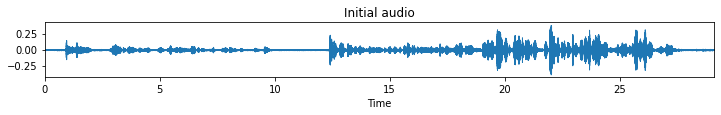

In [226]:
plt.figure(figsize=(12,1))
librosa.display.waveplot(x, sr)
plt.title('Initial audio')
rawsound

In [227]:
len(xt)

445952

We find the actual length of the longest audio improvised clip 

In [222]:
duration = 0
frames = 0
rate = 0
with contextlib.closing(wave.open('IEMOCAP_Extracted/IEMOCAP_full_release/Session1/sentences/wav/Ses01F_impro06/Ses01F_impro06_F028.wav','r')) as f:
    frames = f.getnframes()
    rate = f.getframerate()
    duration = frames / float(rate)

In [223]:
print(frames)
print(rate)
print(duration)

466079
16000
29.1299375


We want each audio clip to be <b>160000</b> frames long (for 10 sec clips).

In [192]:
max(xt)

32767.0

In [193]:
index_max = max(range(len(xt)), key=xt.__getitem__)

In [194]:
xt[index_max]

32767.0

In [195]:
total_length = len(xt)
total_length

158720

In [200]:
counter

1280

We try it for one

In [228]:
counter = 160000
left_remaining = []
right_remaining = []
sub_audio = []

point = max(range(len(xt)), key=xt.__getitem__)
left_pointer = point - 1
right_pointer = point

sub_audio.append(xt[point]) # we get the initial point (highest frequency audio frame)
while(counter > 0):
    if(right_pointer >= len(xt)): #dead end right
        #code snippet
        while(counter > 0):
            left_remaining.append(xt[left_pointer])
            left_pointer -= 1
            counter -= 1
            #print(counter)
    elif(left_pointer < 0): #dead end left
        #code snippet
        while(counter > 0):
            right_remaining.append(xt[right_pointer])
            right_pointer += 1
            counter -=1
            #print(counter)
    else:
        left_remaining.append(xt[left_pointer])
        right_remaining.append(xt[right_pointer])
        left_pointer -= 1
        right_pointer += 1
        counter -= 2
        #print(counter)
        
    #we iterate 

In [230]:
left_remaining.reverse()

In [231]:
sub_audio = np.concatenate((left_remaining, right_remaining), axis=None)

In [232]:
sub_audio

array([ 380.,  432.,  471., ...,  791., 1019., 1063.], dtype=float32)

In [233]:
len(sub_audio)

160000

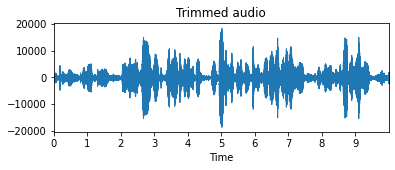

In [246]:
plt.figure(figsize=(6,2))
librosa.display.waveplot(sub_audio, 16000)
plt.title('Trimmed audio')

ipd.display(ipd.Audio(data = sub_audio, rate=16000))

In [209]:
n_wav = []
n_duration = []
for i in range(1, 6):
    path = f'IEMOCAP_Extracted/IEMOCAP_full_release/Session{i}/sentences/wav'
    for folder in sorted(os.listdir(path)):
        if folder == '.ipynb_checkpoints':
            continue
        elif folder[7] == 's':
            continue
        for file in sorted(os.listdir(f'{path}/{folder}')):
            if file == '.ipynb_checkpoints':
                continue
            elif file[-4:] != '.wav':
                continue
                
            else:
                rawsound = AudioSegment.from_file(path+"/"+folder+"/"+file)
                x, sr = librosa.load(path2, sr = None)
                normalizedsound = effects.normalize(rawsound, headroom = 5.0) 
                normal_x = np.array(normalizedsound.get_array_of_samples(), dtype = 'float32')
                xt, index = librosa.effects.trim(normal_x, top_db = 30)
                frames = len(xt)
                rate = sr
                duration = frames / float(rate)
                if(duration > 10):
                    n_wav.append(file)
                    n_duration.append(duration)

In [212]:
sr

16000

In [213]:
for i in range(len(n_wav)):
    if(n_wav[i][0] == 'S'):
        print(n_wav[i])

Ses01F_impro04_F002.wav
Ses01F_impro05_F015.wav
Ses01F_impro05_M011.wav
Ses01F_impro06_F006.wav
Ses01F_impro06_F011.wav
Ses01F_impro06_F020.wav
Ses01F_impro06_F021.wav
Ses01F_impro06_F025.wav
Ses01F_impro06_F028.wav
Ses01F_impro07_F002.wav
Ses01F_impro07_F014.wav
Ses01F_impro07_M015.wav
Ses01F_impro07_M019.wav
Ses01M_impro03_F010.wav
Ses01M_impro03_M008.wav
Ses01M_impro03_M017.wav
Ses01M_impro04_F011.wav
Ses01M_impro04_M004.wav
Ses01M_impro04_M005.wav
Ses01M_impro05_M013.wav
Ses01M_impro06_M006.wav
Ses01M_impro06_M017.wav
Ses01M_impro07_F014.wav
Ses01M_impro07_F027.wav
Ses01M_impro07_F034.wav
Ses01M_impro07_M003.wav
Ses01M_impro07_M010.wav
Ses01M_impro07_M013.wav
Ses02F_impro01_F016.wav
Ses02F_impro01_F021.wav
Ses02F_impro02_F004.wav
Ses02F_impro02_F007.wav
Ses02F_impro02_F008.wav
Ses02F_impro02_F013.wav
Ses02F_impro02_M003.wav
Ses02F_impro02_M007.wav
Ses02F_impro02_M009.wav
Ses02F_impro03_F006.wav
Ses02F_impro03_F009.wav
Ses02F_impro03_F021.wav
Ses02F_impro04_F005.wav
Ses02F_impro04_F

In [214]:
def shorten_to_ten(xt):
    counter = 160000
    left_remaining = []
    right_remaining = []

    point = max(range(len(xt)), key=xt.__getitem__)
    left_pointer = point - 1
    right_pointer = point

    while(counter > 0):
        if(right_pointer >= len(xt)): #dead end right
            #code snippet
            while(counter > 0):
                left_remaining.append(xt[left_pointer])
                left_pointer -= 1
                counter -= 1
        elif(left_pointer < 0): #dead end left
            #code snippet
            while(counter > 0):
                right_remaining.append(xt[right_pointer])
                right_pointer += 1
                counter -=1
        else:
            left_remaining.append(xt[left_pointer])
            right_remaining.append(xt[right_pointer])
            left_pointer -= 1
            right_pointer += 1
            counter -= 2
        #we iterate 
    left_remaining.reverse()
    sub_audio = np.concatenate((left_remaining, right_remaining), axis=None)
    return sub_audio
    

We do it for all

In [216]:
X_mel, X_mfcc, wav_name = [], [], []
wav_file = []
wav_file_xt = []
counter_g = 0
for i in range(1, 6):
    path = f'IEMOCAP_Extracted/IEMOCAP_full_release/Session{i}/sentences/wav'
    for folder in sorted(os.listdir(path)):
        if folder == '.ipynb_checkpoints':
            continue
        elif folder[7] == 's':
            continue
        for file in sorted(os.listdir(f'{path}/{folder}')):
            if file == '.ipynb_checkpoints':
                continue
            elif file[-4:] != '.wav':
                continue
                
            wav_path = path+"/"+folder+"/"+file
            with contextlib.closing(wave.open(wav_path,'r')) as f:
                
                # Fetch the sample rate.
                _, sr = librosa.load(path = wav_path, sr = None) # sr (the sample rate) is used for librosa's MFCCs. '_' is irrelevant.
                # Load the audio file.
                rawsound = AudioSegment.from_file(wav_path) 
                # Normalize the audio to +5.0 dBFS.
                normalizedsound = effects.normalize(rawsound, headroom = 0) 
                # Transform the normalized audio to np.array of samples.
                normal_x = np.array(normalizedsound.get_array_of_samples(), dtype = 'float32')
                # Trim silence from the beginning and the end.
                xt, index = librosa.effects.trim(normal_x, top_db=30)
                #print(file,"\t", len(xt), "\t", rawsound.dBFS, "\t", normalizedsound.dBFS) #--QA purposes if needed-- 
                
                # For audio that is more than 10 seconds
                for j in range(len(n_wav)):
                    if(file == n_wav[j]):
                        print(file)
                        xt = shorten_to_ten(xt)
                        counter_g += 1
                # Pad for duration equalization.
                padded_x = np.pad(xt, (0, 160000-len(xt)), 'constant')
                # Noise reduction.
                final_x = nr.reduce_noise(padded_x, sr=sr) #updated 03/03/22
            
                # Features extraction 
                mel = librosa.feature.melspectrogram(final_x, sr=sr)
                mfcc = librosa.feature.mfcc(y=final_x, sr=sr, n_mfcc=40)
                
                X_mel.append(mel)
                X_mfcc.append(mfcc)
                wav_name.append(wav_path)    
                wav_file_xt.append(final_x)
                
                #print(file)

Ses01F_impro04_F002.wav
Ses01F_impro05_F015.wav
Ses01F_impro05_M011.wav
Ses01F_impro06_F006.wav
Ses01F_impro06_F011.wav
Ses01F_impro06_F020.wav
Ses01F_impro06_F021.wav
Ses01F_impro06_F025.wav
Ses01F_impro06_F028.wav
Ses01F_impro07_F002.wav
Ses01F_impro07_F014.wav
Ses01F_impro07_M015.wav
Ses01F_impro07_M019.wav
Ses01M_impro03_F010.wav
Ses01M_impro03_M008.wav
Ses01M_impro03_M017.wav
Ses01M_impro04_F011.wav
Ses01M_impro04_M004.wav
Ses01M_impro04_M005.wav
Ses01M_impro05_M013.wav
Ses01M_impro06_M006.wav
Ses01M_impro06_M017.wav
Ses01M_impro07_F014.wav
Ses01M_impro07_F027.wav
Ses01M_impro07_F034.wav
Ses01M_impro07_M003.wav
Ses01M_impro07_M010.wav
Ses01M_impro07_M013.wav
Ses02F_impro01_F016.wav
Ses02F_impro01_F021.wav
Ses02F_impro02_F004.wav
Ses02F_impro02_F007.wav
Ses02F_impro02_F008.wav
Ses02F_impro02_F013.wav
Ses02F_impro02_M003.wav
Ses02F_impro02_M007.wav
Ses02F_impro02_M009.wav
Ses02F_impro03_F006.wav
Ses02F_impro03_F009.wav
Ses02F_impro03_F021.wav
Ses02F_impro04_F005.wav
Ses02F_impro04_F

In [235]:
import joblib

joblib.dump(X_mel, 'IEMOCAP_Data/Processed_10_Seconds/audio_features_mel_2d', compress=0, protocol=None, cache_size=None)
joblib.dump(X_mfcc, 'IEMOCAP_Data/Processed_10_Seconds/audio_features_mfcc_2d', compress=0, protocol=None, cache_size=None)
joblib.dump(wav_name, 'IEMOCAP_Data/Processed_10_Seconds/wav_file_names', compress=0, protocol=None, cache_size=None)
joblib.dump(wav_file_xt, 'IEMOCAP_Data/Processed_10_Seconds/wav_file_xt', compress=0, protocol=None, cache_size=None)


['IEMOCAP_Data/Processed_10_Seconds/wav_file_xt']

In [237]:
labels_df = pd.read_csv('IEMOCAP_Data/PreProcessed/audio_labels.csv')
labels_df = labels_df.sort_values(by=['wav_file'], ascending=True)
labels_df = labels_df.reset_index()
labels_df.drop('index', inplace=True, axis=1)
labels_df.drop(['sig_mean', 'sig_std', 'rmse_mean', 'rmse_std', 'silence', 'harmonic', 'auto_corr_max', 'auto_corr_std'], axis=1, inplace=True)
#labels_df = labels_df.drop(columns=['Unnamed: 0'])
labels_df

wav_file  label
0     Ses01F_impro01_F000      7
1     Ses01F_impro01_F001      7
2     Ses01F_impro01_F002      7
3     Ses01F_impro01_F003      8
4     Ses01F_impro01_F004      8
...                   ...    ...
4778  Ses05M_impro08_M024      7
4779  Ses05M_impro08_M025      7
4780  Ses05M_impro08_M026      1
4781  Ses05M_impro08_M027      7
4782  Ses05M_impro08_M028      1

[4783 rows x 2 columns]

In [240]:
wav_file = []
for i in range(len(wav_name)):
    wav_file.append(wav_name[i][77:-4])
for i in range(len(wav_file)):
    if(wav_file[i][0] == '/'):
        wav_file[i] = wav_file[1:]

In [242]:
labels = []
wav_new = []

for i in range(0, 4783):
    found = False
    for j in range(len(labels_df)):
        if wav_file[i] == labels_df.loc[j]['wav_file']:
            labels.append(labels_df.loc[j]['label'])
            wav_new.append(wav_file[i])
            found = True
            #print(f'Index {i}: {wav_file[i]} found.')
            break
    if found == False:
        labels.append(None)
        wav_new.append(None)
        #print(f'Index {i}: {wav_file[i]} not found.')

In [244]:
len(labels) 

4783

In [245]:
joblib.dump(labels, 'IEMOCAP_Data/Processed_10_Seconds/labels', compress=0, protocol=None, cache_size=None)

['IEMOCAP_Data/Processed_10_Seconds/labels']